In [1]:
import pandas as pd 
import numpy
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
covid=pd.read_csv(r"C:\Users\pagod\OneDrive\Desktop\Python\owid-covid-data.csv")

In [9]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409562 entries, 0 to 409561
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409562 non-null  object 
 1   continent                                   389975 non-null  object 
 2   location                                    409562 non-null  object 
 3   date                                        409562 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-null  float64
 

In [260]:
covid["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [13]:
covid.shape

(409562, 67)

In [15]:
covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [11]:
covid.loc[:,["location","continent"]]

,location,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
409557,Zimbabwe,Africa
409558,Zimbabwe,Africa
409559,Zimbabwe,Africa
409560,Zimbabwe,Africa


In [13]:
non_nazioni=["Upper middle income","World","Low income", "Lower middle income"]
filtro = (covid["location"].notnull() | covid["continent"].notnull()) & (~covid["location"].isin(non_nazioni))
covid2=covid.loc[filtro]
totale_casi_continente = covid2.groupby("continent")["new_cases"].sum()

totale_casi_continente = totale_casi_continente.reset_index()
totale_casi_continente.columns = ["continent", "totale_casi"]

print("I casi totali per continente sono:")
print(totale_casi_continente)

I casi totali per continente sono:
       continent  totale_casi
0         Africa   13144264.0
1           Asia  301515124.0
2         Europe  252672573.0
3  North America  124572945.0
4        Oceania   14973467.0
5  South America   68832646.0


In [8]:
continente1 = input("Inserisci il nome del primo continente: ")
continente2 = input("Inserisci il nome del secondo continente: ")
non_nazioni=["Upper middle income","World","Low income", "Lower middle income"]
filtro = (covid["location"].notnull() | covid["continent"].notnull()) & (~covid["location"].isin(non_nazioni))
covid2=covid.loc[filtro]
totale_casi_continente = covid2.groupby("continent")["new_cases"].sum()

totale_casi_continente = totale_casi_continente.reset_index()
totale_casi_continente.columns = ["continent", "totale_casi"]


print("I casi totali per continente sono:")

casi_totali_mondiali = totale_casi_continente["totale_casi"].sum()

filtro_continente1 = covid2["continent"] == continente1
filtro_continente2 = covid2["continent"] == continente2
f_continente1=covid2.loc[filtro_continente1]
f_continente2=covid2.loc[filtro_continente2]

media_continente1 = f_continente1["total_cases"].mean()
media_continente2 = f_continente2["total_cases"].mean()

massimo_continente1 = f_continente1["total_cases"].max()
massimo_continente2 = f_continente2["total_cases"].max()

percentuale_continente1 = (f_continente1["new_cases"].sum()*100) / casi_totali_mondiali
percentuale_continente2 = (f_continente2["new_cases"].sum() *100)/ casi_totali_mondiali 
if massimo_continente1 > massimo_continente2:
    print("Il massimo dei casi totali è maggiore in ",continente1," con ",massimo_continente1)
else:
    print("Il massimo dei casi totali è maggiore in ",continente2," con ",massimo_continente2)

if media_continente1 > media_continente2:
    print("La media dei casi totali è maggiore in ",continente1," con ",media_continente1)
else:
    print("La media dei casi totali è maggiore in ",continente2," con ",media_continente2)

if percentuale_continente1 > percentuale_continente2:
    print("La percentuale dei casi totali è maggiore in ",continente1," con ",percentuale_continente1)

else:
    print("La percentuale dei casi totali è maggiore in ",continente2," con ",percentuale_continente2)

locations = covid2["location"].unique()

for location in locations:
    f_location = covid2[covid2["location"] == location]
    massimo_location = f_location["total_cases"].max()
    media_location = f_location["total_cases"].mean()
    percentuale_location = (f_location["new_cases"].sum() / casi_totali_mondiali) * 100

    print("Descrittori statistici per ",location)
    print("Massimo:",massimo_location)
    print("Media:",media_location)
    print("Percentuale rispetto ai casi totali mondiali:", percentuale_location)

Inserisci il nome del primo continente:  Oceania
Inserisci il nome del secondo continente:  Europe


I casi totali per continente sono:
Il massimo dei casi totali è maggiore in  Europe  con  38997490.0
La media dei casi totali è maggiore in  Europe  con  2801516.961143228
La percentuale dei casi totali è maggiore in  Europe  con  32.573028719603634
Descrittori statistici per  Afghanistan
Massimo: 235214.0
Media: 149434.98725302742
Percentuale rispetto ai casi totali mondiali: 0.030322374471774778
Descrittori statistici per  Africa
Massimo: 13142813.0
Media: 8826753.322804801
Percentuale rispetto ai casi totali mondiali: 1.694479474707578
Descrittori statistici per  Albania
Massimo: 335047.0
Media: 218146.4688102894
Percentuale rispetto ai casi totali mondiali: 0.04319224450774497
Descrittori statistici per  Algeria
Massimo: 272034.0
Media: 196366.592096877
Percentuale rispetto ai casi totali mondiali: 0.03506898746271387
Descrittori statistici per  American Samoa
Massimo: 8359.0
Media: 6471.542914171657
Percentuale rispetto ai casi totali mondiali: 0.0010775920149717509
Descrittori st

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

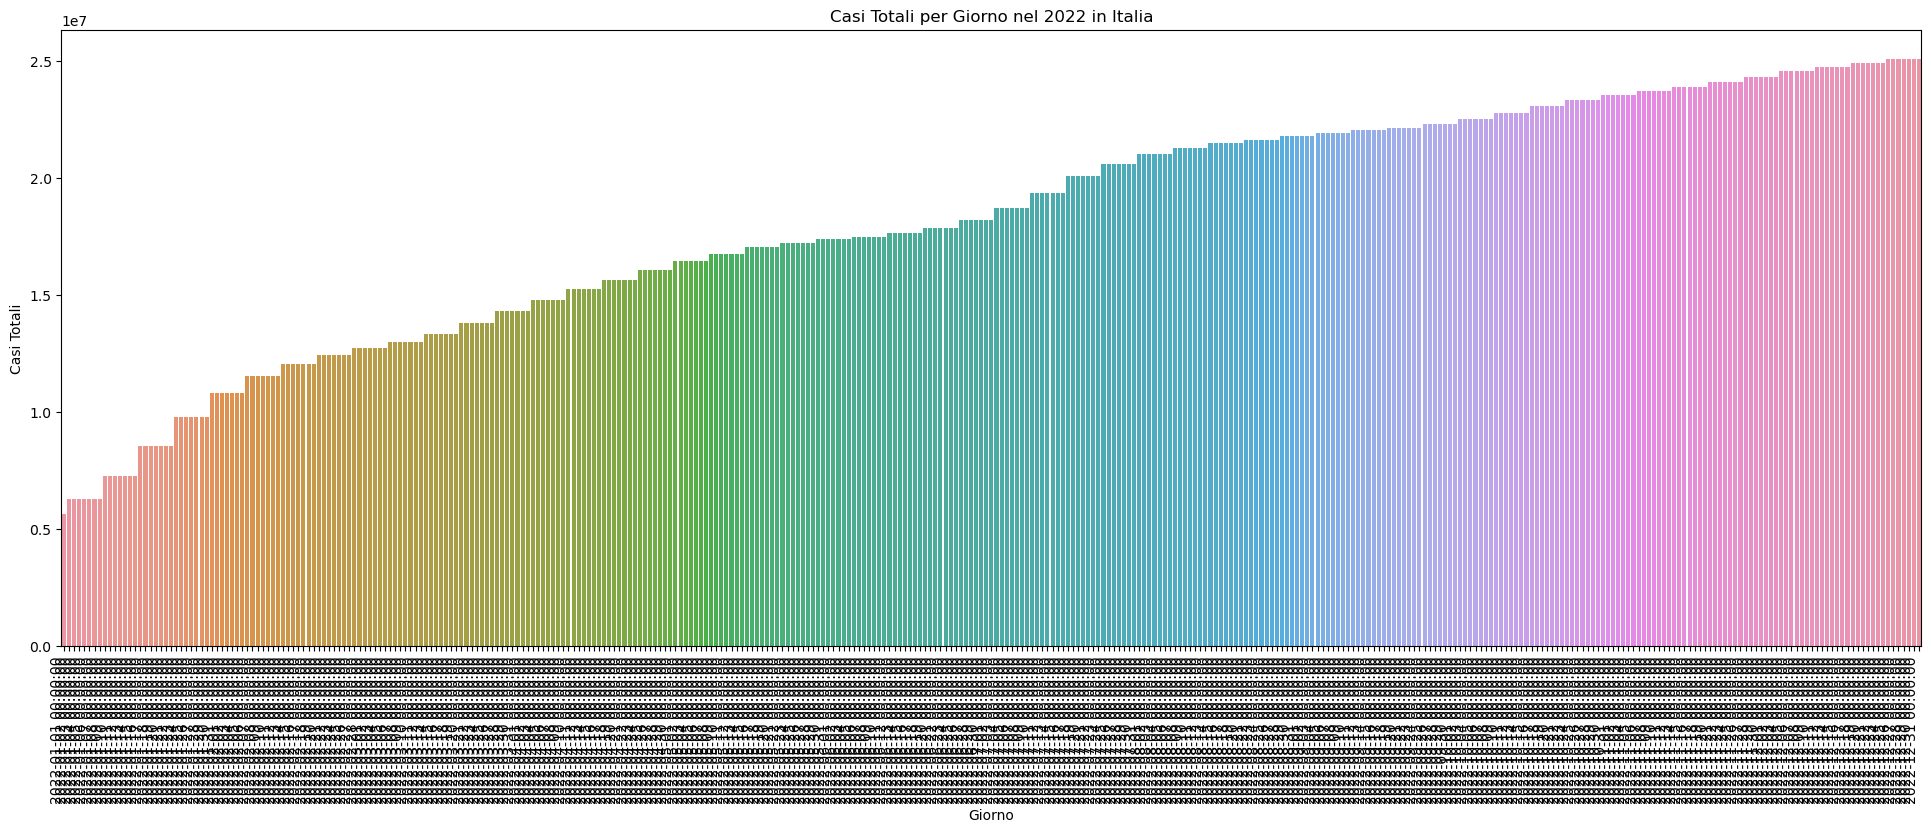

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid["date"] = pd.to_datetime(covid["date"])

filtro_italia = ((covid["location"] == "Italy") & (covid["date"].dt.year == 2022))
dati_italia=covid.loc[filtro_italia]
dati_x_giorno = dati_italia.groupby("date")["total_cases"].sum().reset_index()
filtro_0=(dati_x_giorno["total_cases"]!=0.0)
dati_utili=dati_x_giorno.loc[filtro_0]
plt.figure(figsize=(24, 8))
sns.barplot(x="date", y="total_cases", data=dati_utili)
plt.title("Casi Totali per Giorno nel 2022 in Italia")
plt.xlabel("Giorno")
plt.ylabel("Casi Totali")
plt.xticks(rotation=90, ha="right") 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, '2022-01-02 00:00:00'),
  Text(1, 0, '2022-01-09 00:00:00'),
  Text(2, 0, '2022-01-16 00:00:00'),
  Text(3, 0, '2022-01-23 00:00:00'),
  Text(4, 0, '2022-01-30 00:00:00'),
  Text(5, 0, '2022-02-06 00:00:00'),
  Text(6, 0, '2022-02-13 00:00:00'),
  Text(7, 0, '2022-02-20 00:00:00'),
  Text(8, 0, '2022-02-27 00:00:00'),
  Text(9, 0, '2022-03-06 00:00:00'),
  Text(10, 0, '2022-03-13 00:00:00'),
  Text(11, 0, '2022-03-20 00:00:00'),
  Text(12, 0, '2022-03-27 00:00:00'),
  Text(13, 0, '2022-04-03 00:00:00'),
  Text(14, 0, '2022-04-10 00:00:00'),
  Text(15, 0, '2022-04-17 00:00:00'),
  Text(16, 0, '2022-04-24 00:00:00'),
  Text(17, 0, '2022-05-01 00:00:00'),
  Text(18, 0, '2022-05-08 00:00:00'),
  Text(19, 0, '2022-05-15 00:00:00'),
  Text(2

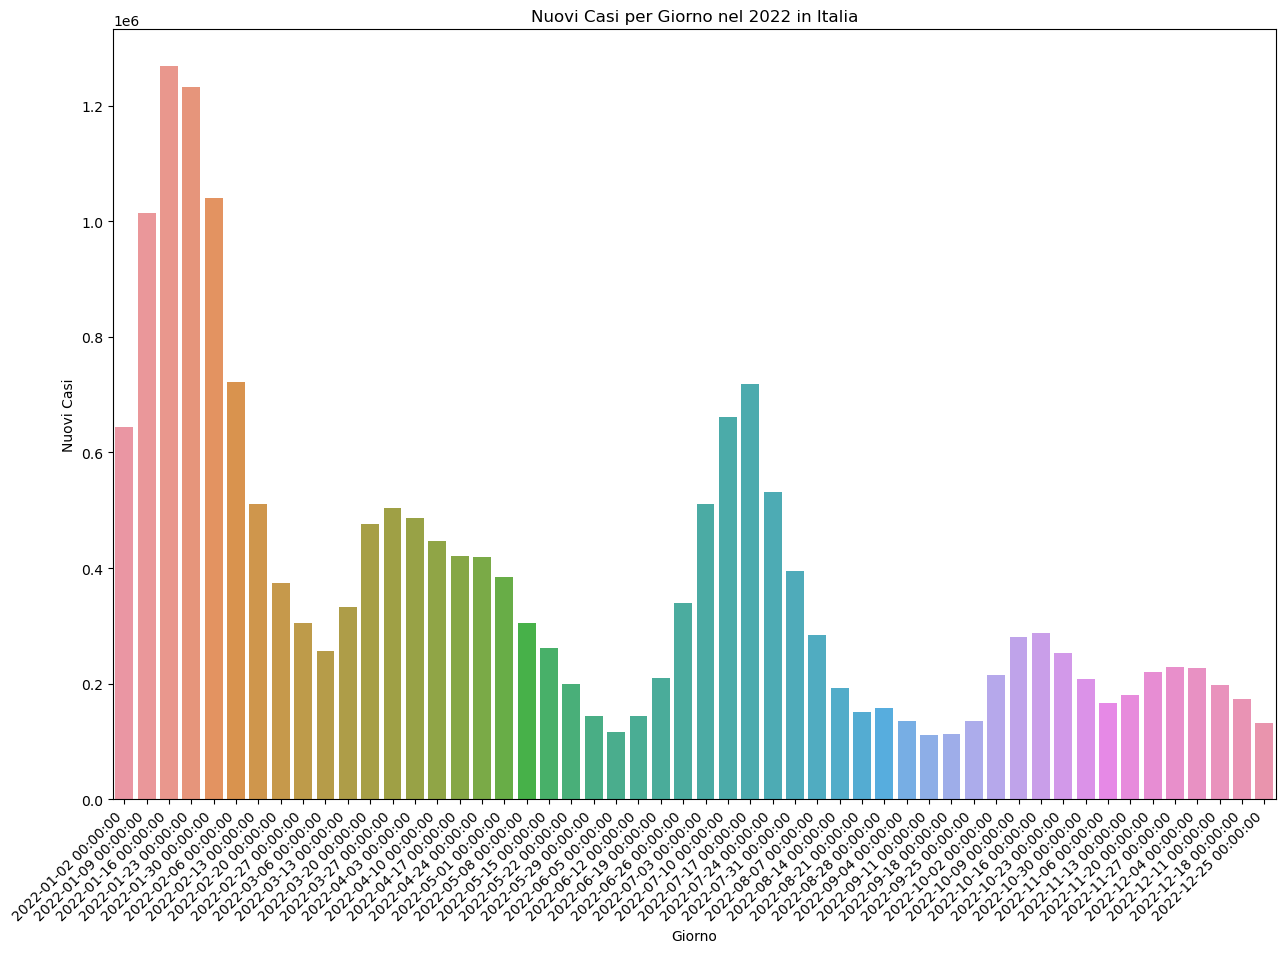

In [127]:
covid["date"] = pd.to_datetime(covid["date"])

filtro_italia = ((covid["location"] == "Italy") & (covid["date"].dt.year == 2022))
dati_italia=covid.loc[filtro_italia]
dati_x_giorno = dati_italia.groupby("date")["new_cases"].sum().reset_index()
filtro_0=(dati_x_giorno["new_cases"]!=0.0)
dati_utili=dati_x_giorno.loc[filtro_0]
plt.figure(figsize=(15, 10))
sns.barplot(x="date", y="new_cases", data=dati_utili)
plt.title("Nuovi Casi per Giorno nel 2022 in Italia")
plt.xlabel("Giorno")
plt.ylabel("Nuovi Casi")
plt.xticks(rotation=45, ha="right") 

C:\Users\pagod\AppData\Local\Temp\ipykernel_31336\1962424065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_utili["new_cases_cumsum"] = dati_utili["new_cases"].cumsum()


Si nota come l'andamneto dei casi totali sia molto simile all'andamento cumulativo dei nuovi casi.
Si può dedurre che questi valori siano molto correlati tra loro e che le guarigioni non incidano particolarmente sui casi totali


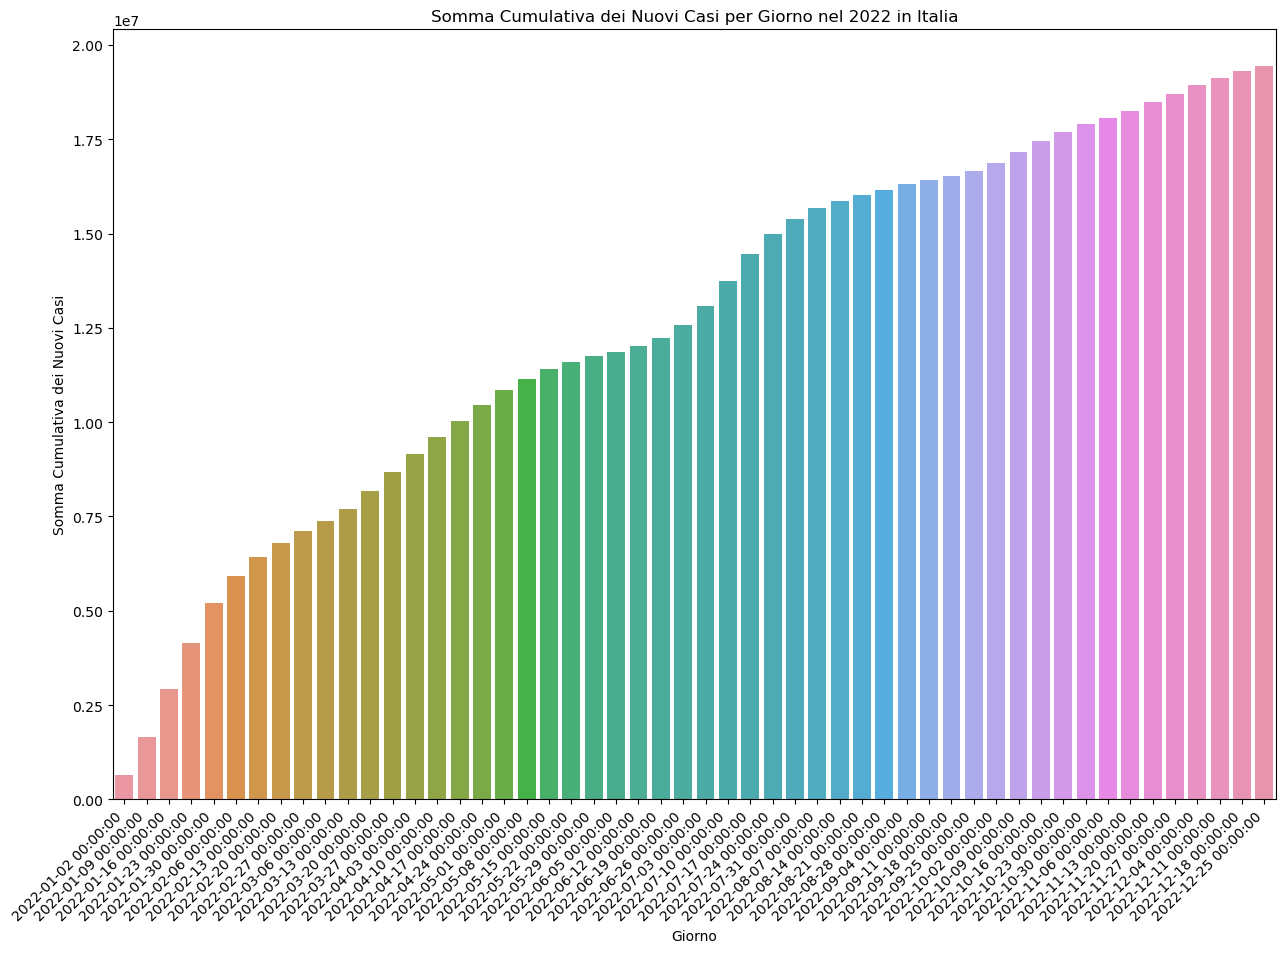

In [129]:
covid["date"] = pd.to_datetime(covid["date"])

filtro_italia = ((covid["location"] == "Italy") & (covid["date"].dt.year == 2022))
dati_italia=covid.loc[filtro_italia]
dati_x_giorno = dati_italia.groupby("date")["new_cases"].sum().reset_index()
filtro_0=(dati_x_giorno["new_cases"]!=0.0)
dati_utili=dati_x_giorno.loc[filtro_0]
dati_utili["new_cases_cumsum"] = dati_utili["new_cases"].cumsum()
plt.figure(figsize=(15, 10))
sns.barplot(x="date", y="new_cases_cumsum", data=dati_utili)
plt.title("Somma Cumulativa dei Nuovi Casi per Giorno nel 2022 in Italia")
plt.xlabel("Giorno")
plt.ylabel("Somma Cumulativa dei Nuovi Casi")
plt.xticks(rotation=45, ha="right") 
print("Si nota come l'andamneto dei casi totali sia molto simile all'andamento cumulativo dei nuovi casi.")
print("Si può dedurre che questi valori siano molto correlati tra loro e che le guarigioni non incidano particolarmente sui casi totali")

La Germania ha il numero più alto di pazienti in terapia intensiva con la mediana più elevata e il range più ampio.
A seguire abbiamo la Francia con dei valori simili alla Germania per quanto riguarda la mediana, ma con un range visibilmente minore.
L'Italia ha il minor numero di pazienti in terapia intensiva, con una mediana e un range molto inferiori rispetto agli altri due paesi.


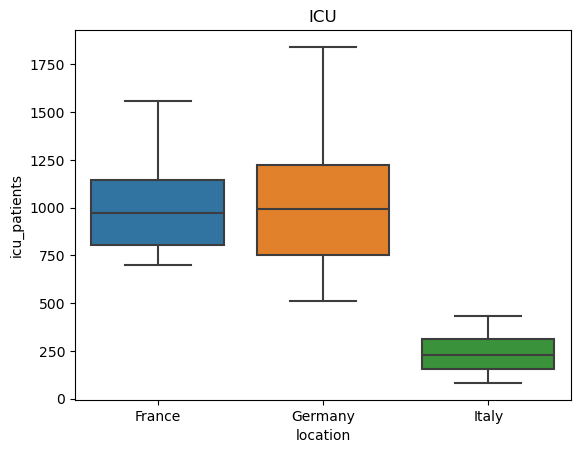

In [40]:
import matplotlib.pyplot as plt
nazioni = ["France", "Italy", "Germany"]
data_in = "2022-05-01"
datafin = "2023-04-30"
covid["date"] = pd.to_datetime(covid["date"])
filtro = ((covid["location"].isin(nazioni)) & (covid["date"] >= data_in) & (covid["date"] <= datafin))
colonne_filtrate=covid[filtro]

colonne_filtrate=colonne_filtrate.reset_index()

sns.boxplot(x="location", y="icu_patients", data=colonne_filtrate)
plt.title("ICU")
 

print("La Germania ha il numero più alto di pazienti in terapia intensiva con la mediana più elevata e il range più ampio.")
print("A seguire abbiamo la Francia con dei valori simili alla Germania per quanto riguarda la mediana, ma con un range visibilmente minore.")
print("L'Italia ha il minor numero di pazienti in terapia intensiva, con una mediana e un range molto inferiori rispetto agli altri due paesi.")


Non ritengo si possano gestire tramite sostituzione, magari si potrebbero interpolare.
Tuttavia, la variabilità dei dati covid non permette di fare queste sostituzioni, risulta più corretto non intervenire.
Coesistono poi una serie di criticità all'interno del Dataset per quanto riguarda le ospedalizzazioni.
La mancaza di dati, sia per quanto riguarda quelli settimanali sia per quanto riguarda i giornalieri,
e la loro ripetitività cumulativa rende di difficile creazione un grafico con valori coerenti con la realtà per quanta riguarda il totale degli ospdedalizzati.


Text(0.5, 1.0, 'WHA')

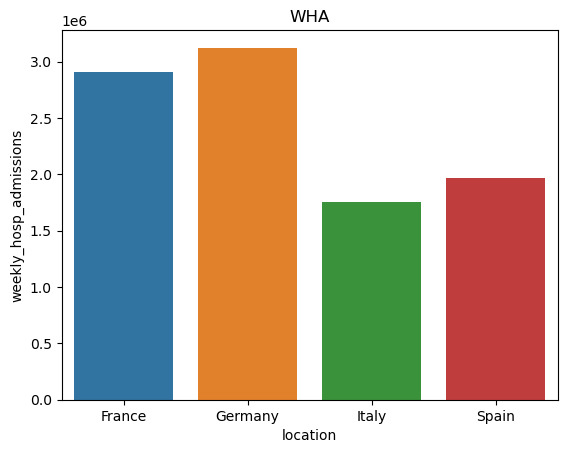

In [42]:
nazioni = ["France", "Italy", "Germany","Spain"]
covid["date"] = pd.to_datetime(covid["date"])
filtro = (covid["location"].isin(nazioni)  & (covid["date"].dt.year == 2022))
colonne_filtrate=covid[filtro]
pazienti_osp=colonne_filtrate.groupby("location")["weekly_hosp_admissions"].sum().reset_index()
print("Non ritengo si possano gestire tramite sostituzione, magari si potrebbero interpolare.")
print("Tuttavia, la variabilità dei dati covid non permette di fare queste sostituzioni, risulta più corretto non intervenire.")
print("Coesistono poi una serie di criticità all'interno del Dataset per quanto riguarda le ospedalizzazioni.")
print("La mancaza di dati, sia per quanto riguarda quelli settimanali sia per quanto riguarda i giornalieri,") 
print("e la loro ripetitività cumulativa rende di difficile creazione un grafico con valori coerenti con la realtà per quanta riguarda il totale degli ospdedalizzati.")
sns.barplot(x="location", y="weekly_hosp_admissions", data=pazienti_osp)
plt.title("WHA")